In [5]:
import vanna
from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key="ajsjdajsd")
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask("What are the top 10 albums by sales?")

'NoneType' object has no attribute 'questions'


(None, None, None)

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Playlist]\n(\n    [PlaylistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Playlist] PRIMARY KEY  ([PlaylistId])\n)\n\nCREATE INDEX [IFK_PlaylistTrackTrackId] ON [PlaylistTrack] ([TrackId])\n\nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Na

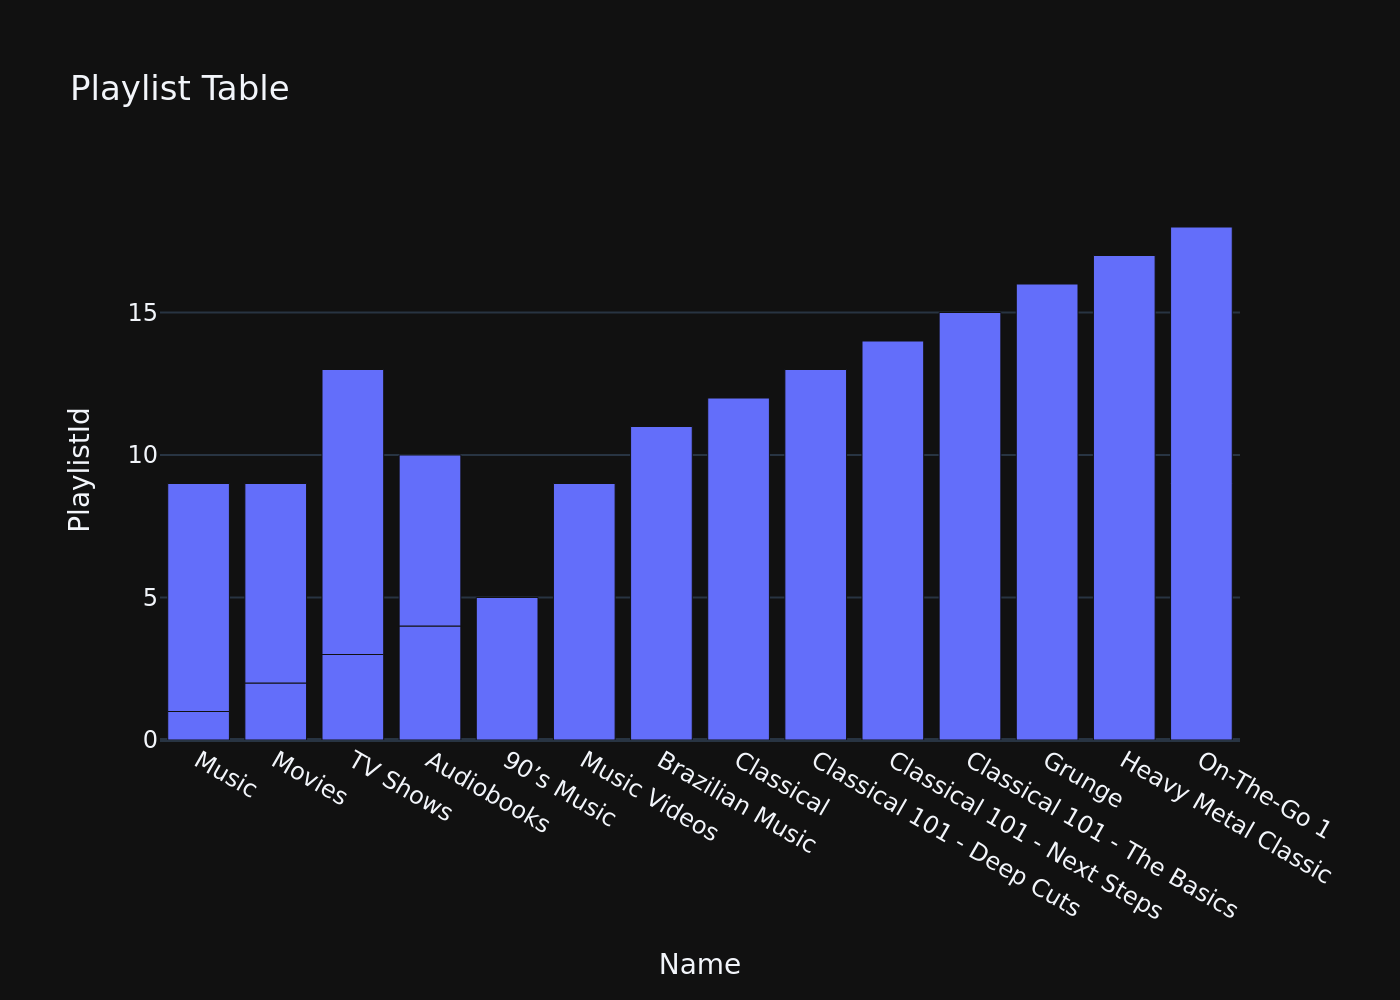

('SELECT * \nFROM Playlist;',
     PlaylistId                        Name
 0            1                       Music
 1            2                      Movies
 2            3                    TV Shows
 3            4                  Audiobooks
 4            5                  90’s Music
 5            6                  Audiobooks
 6            7                      Movies
 7            8                       Music
 8            9                Music Videos
 9           10                    TV Shows
 10          11             Brazilian Music
 11          12                   Classical
 12          13   Classical 101 - Deep Cuts
 13          14  Classical 101 - Next Steps
 14          15  Classical 101 - The Basics
 15          16                      Grunge
 16          17         Heavy Metal Classic
 17          18                 On-The-Go 1,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>PlaylistId=%{y}<extra></extra>',
   

In [6]:
vn.ask("List me the playlist table")

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Traceback (most recent call last):
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1536, in __call__
    return self.wsgi_app(environ, start_response)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1514, in wsgi_app
    response = self.handle_exception(e)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 

None


Traceback (most recent call last):
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1536, in __call__
    return self.wsgi_app(environ, start_response)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1514, in wsgi_app
    response = self.handle_exception(e)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AjaykumarKV\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 